In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
import numpy as np
import glob
import pickle
import pprint
import random

In [2]:
load_directory = "VizDirSMW"

with open(f"{load_directory}/alg.pickle", "rb") as file:
    alg_dict = pickle.load(file) 

with open(f"{load_directory}/combo.pickle", "rb") as file:
    combo_dict = pickle.load(file) 

with open(f"{load_directory}/human.pickle", "rb") as file:
    human_dict = pickle.load(file) 

In [3]:
print(len(combo_dict["all_possibilities_len"]))
print(len(alg_dict["all_possibilities_len"]))
print(len(human_dict["all_possibilities_len"]))


10414
9900
866


In [4]:
pprint.pprint(combo_dict.keys())

dict_keys(['steps', 'rrt_expansion', 'state_switch_iteration_counts', 'steps_per_iteration', 'x_y_level', 'all_embeddings', 'all_possibilities_len', 'bbox_sum', 'nuc_norm'])


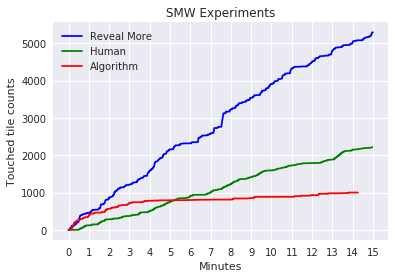

In [27]:
expansion_constant = 7 if "Zelda" in load_directory else 12
run_len = 17 if "Zelda" in load_directory else 15


fig = plt.figure()
ax = plt.axes()

human_expanded_allposibilites = np.array([[value] * expansion_constant for value in human_dict["all_possibilities_len"]]).flatten()

x_axis = range(len(combo_dict["all_possibilities_len"]))
ax.plot(x_axis, combo_dict["all_possibilities_len"], color="blue", label="Reveal More")

x_axis = list(range(len(human_expanded_allposibilites)))
ax.plot(x_axis, human_expanded_allposibilites, color="green", label="Human")

x_axis = range(len(alg_dict["all_possibilities_len"]))
ax.plot(x_axis, alg_dict["all_possibilities_len"], color="red", label="Algorithm")

# x_axis = range(len(forest_dict["all_possibilities_len"]))
# ax.plot(x_axis, forest_dict["all_possibilities_len"], color="orange", label="Forest")


plt.xticks(np.arange(0, run_len + 1) * (len(combo_dict["all_possibilities_len"]) / 15), x_axis)
plt.xlabel('Minutes') 
plt.ylabel('Touched tile counts') 
if "Zelda" in load_directory:
    plt.title("Zelda Experiments")
else:
    plt.title("SMW Experiments")
plt.legend()
# plt.savefig(f'{result_dir_path}/Total Touched Tiles {title_name}.png')
# plt.savefig(f'{all_graphs_path}/Total Touched Tiles {title_name}.png')

In [43]:
# SMW MAP Visualization

In [76]:
level_stores = {} #dictionary taking in a level as a key and y coordinates at said level as an attribute
x_values = []    #list containing all x values from the log

input_start = 0
input_end = 68

output_end = 11
output_start = 22 

for map_x_y in human_dict["x_y_level"]:          # loop through every attribute in log_dict
    if map_x_y[2] < 68:                          # ensures that the y value is not erroniously large
        y_normalized = output_start + ((output_end - output_start) / (input_end - input_start)) * (map_x_y[2] - input_start)#inverts the y value
        
        if map_x_y[0] not in level_stores.keys(): # checks if the current level has a list creates a key, list pairing if it does not
            level_stores[map_x_y[0]] = []
        
        level_stores[map_x_y[0]].append((map_x_y[1], y_normalized))   # appends the inverted y value to the list associated with the current level key
        
print(level_stores.keys())

dict_keys([147, 202, 81, 50, 111, 213, 244, 70, 238, 89, 127, 0, 208, 191, 75, 65, 39])


In [77]:
# 39 = menu
# 65 = intro
# 0 = overworld
# 89 = Yoshis house
# 202 = 1-1
# 50 = 1-2
# 127 = 1-2 cave
# 147 = 1-3
# 244 = 1-4
# 89 = 1-4 2
# 238 = iggy
# 70 = yellow switch
# 75 = yellow switch 2

# 68 is deepest
# 11 top height in starting camera
# 22 ground in starting camera
# 306 farthest

In [80]:
level_to_visaulize = 50
aspect_ratio = 5120.0 / 720.0
size = 8
color = "red"

level_data = np.array(level_stores[level_to_visaulize])

fig = plt.figure(figsize=(aspect_ratio * size, size))
ax = plt.axes()
ax.scatter(level_data[:,0], level_data[:,1], c=color, alpha=.5, ) 
plt.show()
